## 1. 자동차 연결

In [1]:
from RobokitRS.RobokitRS import *
import time as t

rs = RobokitRS()

/Users/hana/miniforge3/lib/python3.10/site-packages/RobokitRS/pins


### 포트 연결

In [2]:
rs.port_open("/dev/cu.SLAB_USBtoUART")

RSBoard serial port opend
Thread init done
Pin mode init done
Sysex init done
RSBoard init done


True

## 2. RGB 센서 연결

In [3]:
# 1. RGB LED 색상 설정 후 ON
rs.set_rgb_led_color(12, 100, 100, 100) # 센서 연결 번호(12), R, G, B(0~100)
rs.set_rgb_led_on(12)

In [4]:
# 2. RGB LED 색상 바꾸기
rs.set_rgb_led_red(12)
rs.delay()
rs.set_rgb_led_on(12)
rs.delay()
rs.set_rgb_led_orange(12)
rs.delay()

## 3. 자동차 주행 함수

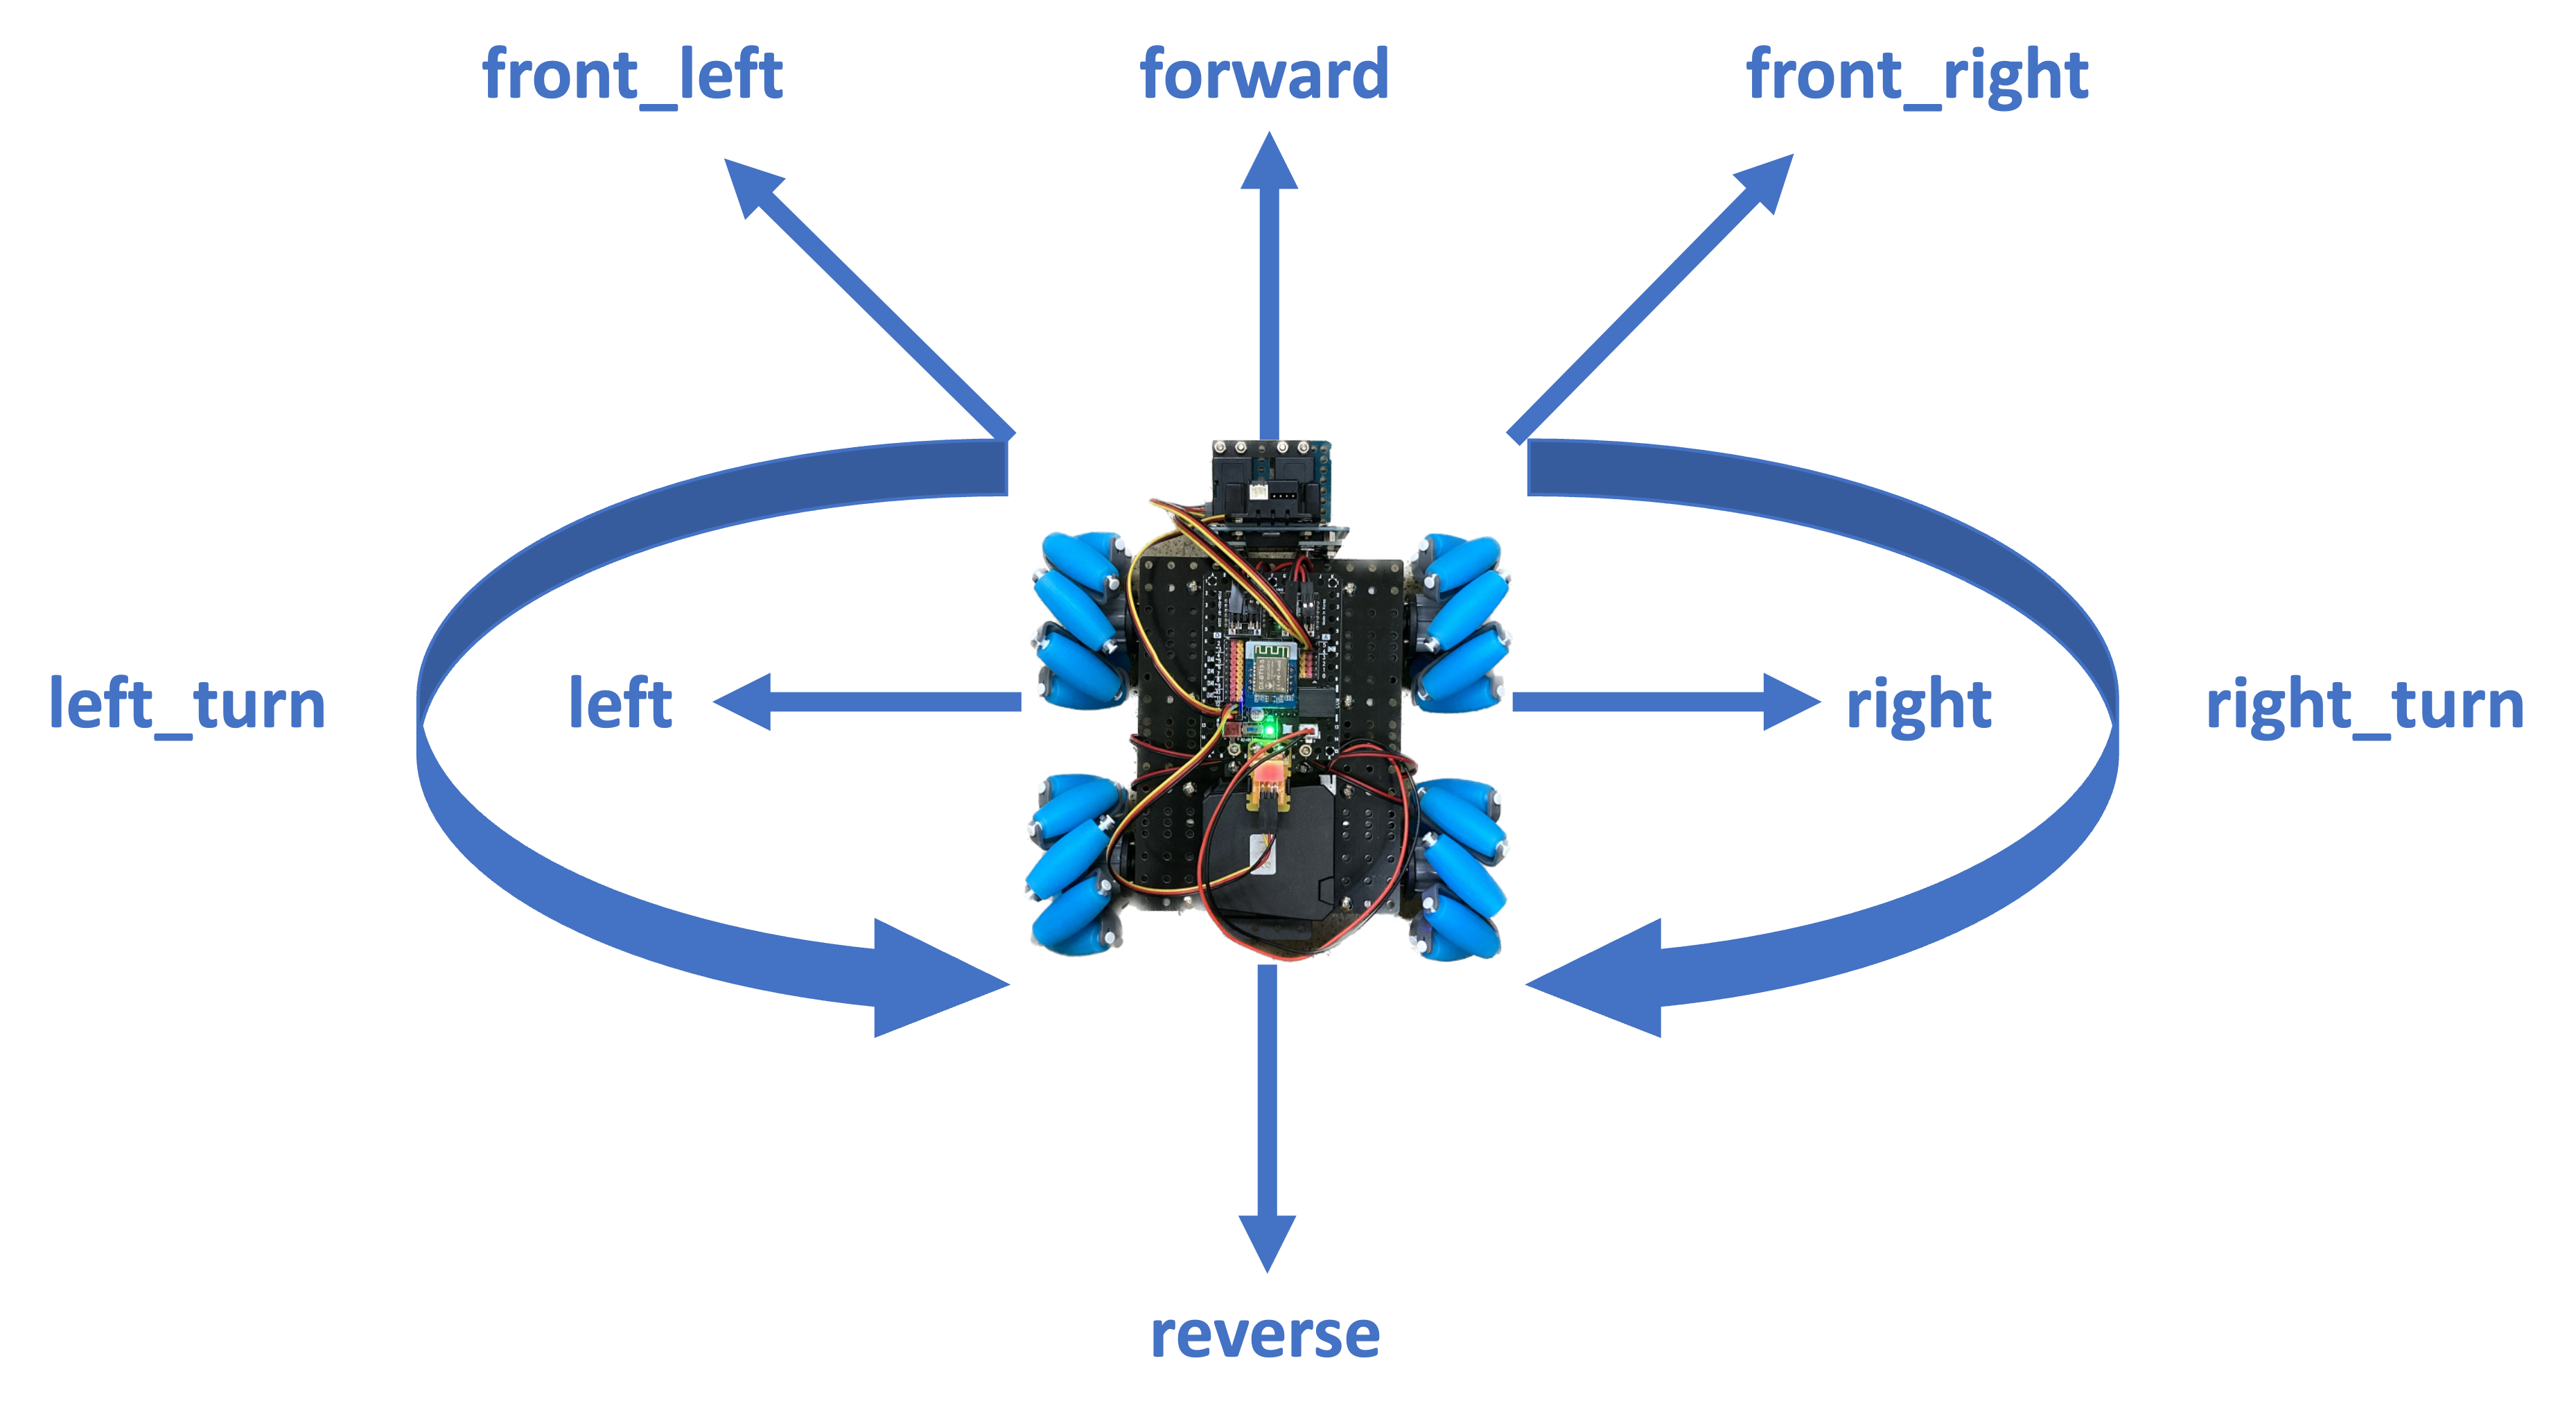

In [5]:
from IPython.display import display, Image
display(Image(filename='./auto mobile direction.png'))

In [4]:
# T: 주행 시간
# v: 주행 속도 (최대: 15)

# 직진
def forward(T, v):
    rs.motor_write(0, 1, v)
    rs.motor_write(1, 0, v)
    rs.motor_write(2, 1, v)
    rs.motor_write(3, 0, v)
    t.sleep(T)
    stop()
    
# 정지
def stop():
    rs.motor_write(0, 0, 0)
    rs.motor_write(1, 0, 0)
    rs.motor_write(2, 0, 0)
    rs.motor_write(3, 0, 0)

# 후진
def reverse(T, v):
    rs.motor_write(0, 0, v)
    rs.motor_write(1, 1, v)
    rs.motor_write(2, 0, v)
    rs.motor_write(3, 1, v)
    t.sleep(T)
    stop()

# 오른쪽
def right(T, v):
    rs.motor_write(0, 1, v)
    rs.motor_write(1, 1, v)
    rs.motor_write(2, 0, v)
    rs.motor_write(3, 0, v)
    t.sleep(T)
    stop()

# 왼쪽
def left(T, v):
    rs.motor_write(0, 0, v)
    rs.motor_write(1, 0, v)
    rs.motor_write(2, 1, v)
    rs.motor_write(3, 1, v)
    t.sleep(T)
    stop()

# 오른쪽 대각선
def front_right(T, v):
    rs.motor_write(0, 1, v)
    rs.motor_write(3, 0, v)
    t.sleep(T)
    stop()

# 왼쪽 대각선
def front_left(T, v):
    rs.motor_write(1, 0, v)
    rs.motor_write(2, 1, v)
    t.sleep(T)
    stop()

# 우회전
def right_turn(T, v):
    rs.motor_write(0, 1, v)
    rs.motor_write(1, 1, v)
    rs.motor_write(2, 1, v)
    rs.motor_write(3, 1, v)
    t.sleep(T)
    stop()

# 좌회전
def left_turn(T, v):
    rs.motor_write(0, 0, v)
    rs.motor_write(1, 0, v)
    rs.motor_write(2, 0, v)
    rs.motor_write(3, 0, v)
    t.sleep(T)
    stop()

# 일시정지
def pause(T):
    t.sleep(T)

## 4. 초음파 센서 연결 및 주행

In [5]:
def obstacle_detection():
    right_turn(1, 5) # 오른쪽 모퉁이와의 거리 측정
    right_dist = rs.sonar_read(13)

    left_turn(2, 5) # 왼쪽 모퉁이와의 거리 측정
    left_dist = rs.sonar_read(13)

    right_turn(1, 5) # 원위치

    if left_dist > right_dist: # 하수구가 왼쪽으로 꺾여있는 경우
        left_turn(1, 3)
        forward(1, 3)
    else: # 하수구가 오른쪽으로 꺾여있는 경우
        right_turn(1, 3)
        forward(1, 3)

In [8]:
rs.sonar_begin(13) # 초음파 센서 연결
rs.set_rgb_led_orange(12) # ready

forward(1, 10)

try:
    while True:
        dist = rs.sonar_read(13) # 초음파 센서로 인식하는 자동차와 장애물 간의 거리
        t.sleep(0.1)
        print(dist)
        rs.set_rgb_led_green(12)

        if dist < 20:
            stop()
            rs.set_rgb_led_orange(12)
            
            print('Ostacle detected')
            obstacle_detection()
            
        else:
            forward(1, 10)
except:
    stop()
    #pass # error 뜨면, try문으로 다시 들어가 초음파 재감지
    
print("종료")

26
4
Ostacle detected
129
4
Ostacle detected
종료


In [ ]:
try:
    while True:
        forward(1, 10)
except:
    stop()
    #pass # error 뜨면, try문으로 다시 들어가 초음파 재감지
    
print("종료")

In [ ]:
forward(1, 10)
forward(1, 10)
forward(1, 10)
